In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
Data_path = "/content/gdrive/My Drive/Datasets/Crop_recommendation.csv"

**Attributes Description**

1.   N - ratio of Nitrogen content in soil
2.   P - ratio of Phosphorous content in soil
3.   K - ratio of Potassium content in soil
4.   temperature - temperature in degree Celsius
5.   humidity - relative humidity in %
6.   ph - ph value of the soil
7.   rainfall - rainfall in mm


**Exploring the Data**

In [4]:
data = pd.read_csv(Data_path)
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


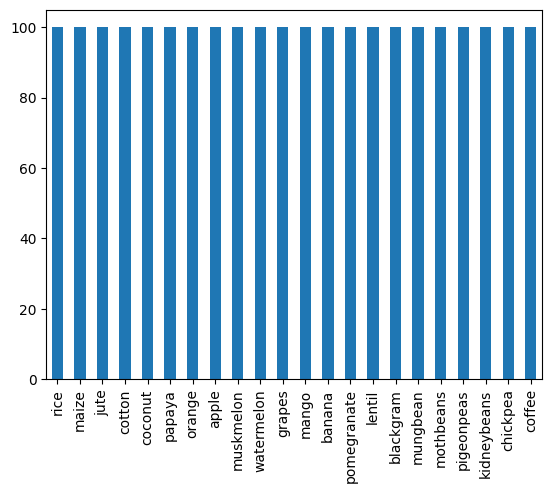

In [6]:
labels = data["label"].unique()
data["label"].value_counts().plot(kind="bar")
plt.show()

**Observation:** The dataset is completely balanced. There is no need to balance the data.

# Univariate Analysis

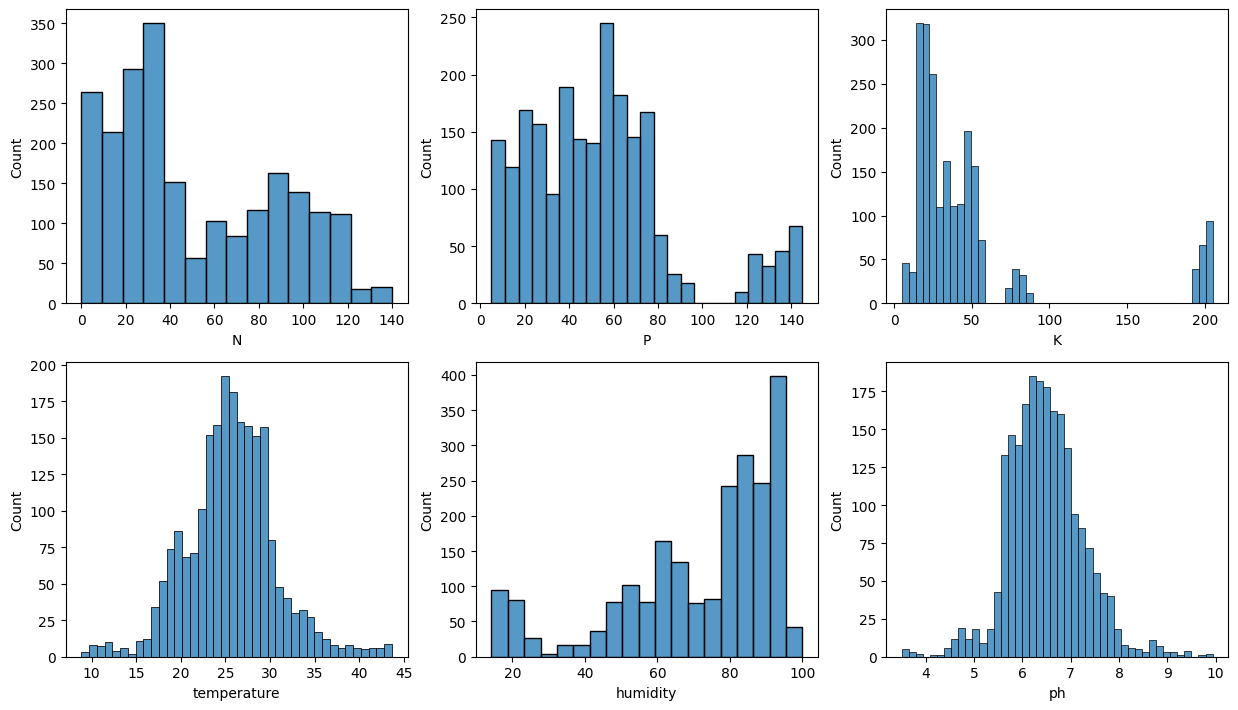

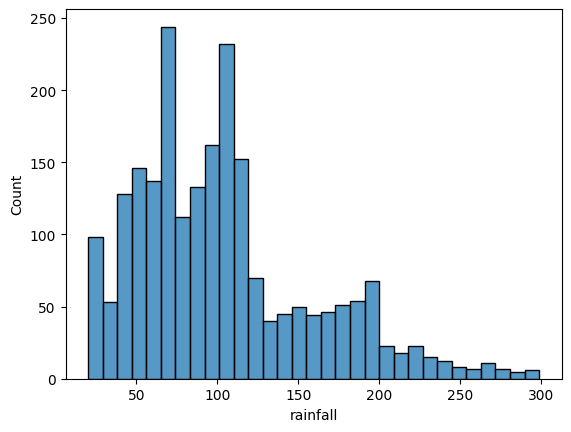

In [7]:
all_columns = data.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:-1]:
    plt.subplot(3,3,i)
    sns.histplot(data[column])
    i+=1
plt.show()

sns.histplot(data[all_columns[-1]])
plt.show()

# Bivariate Analysis

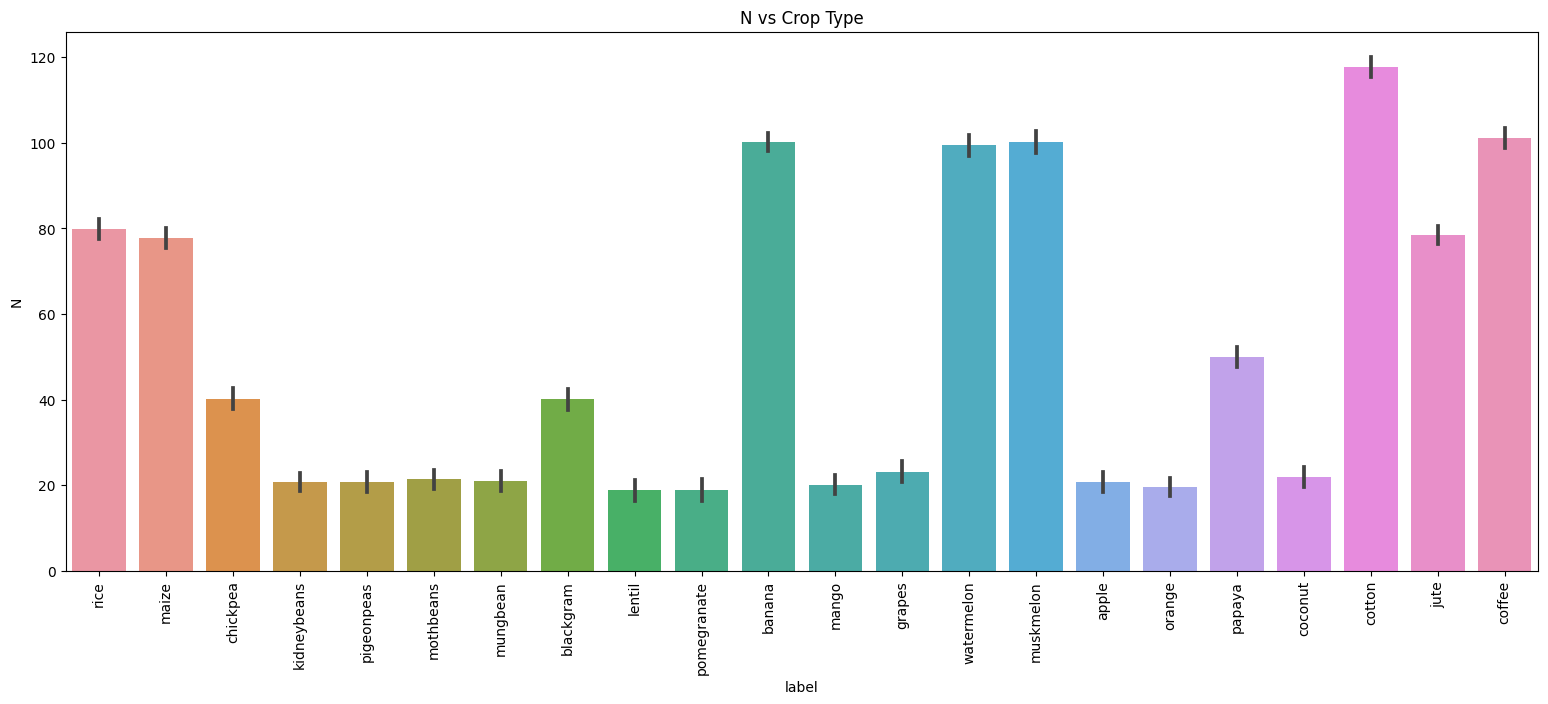

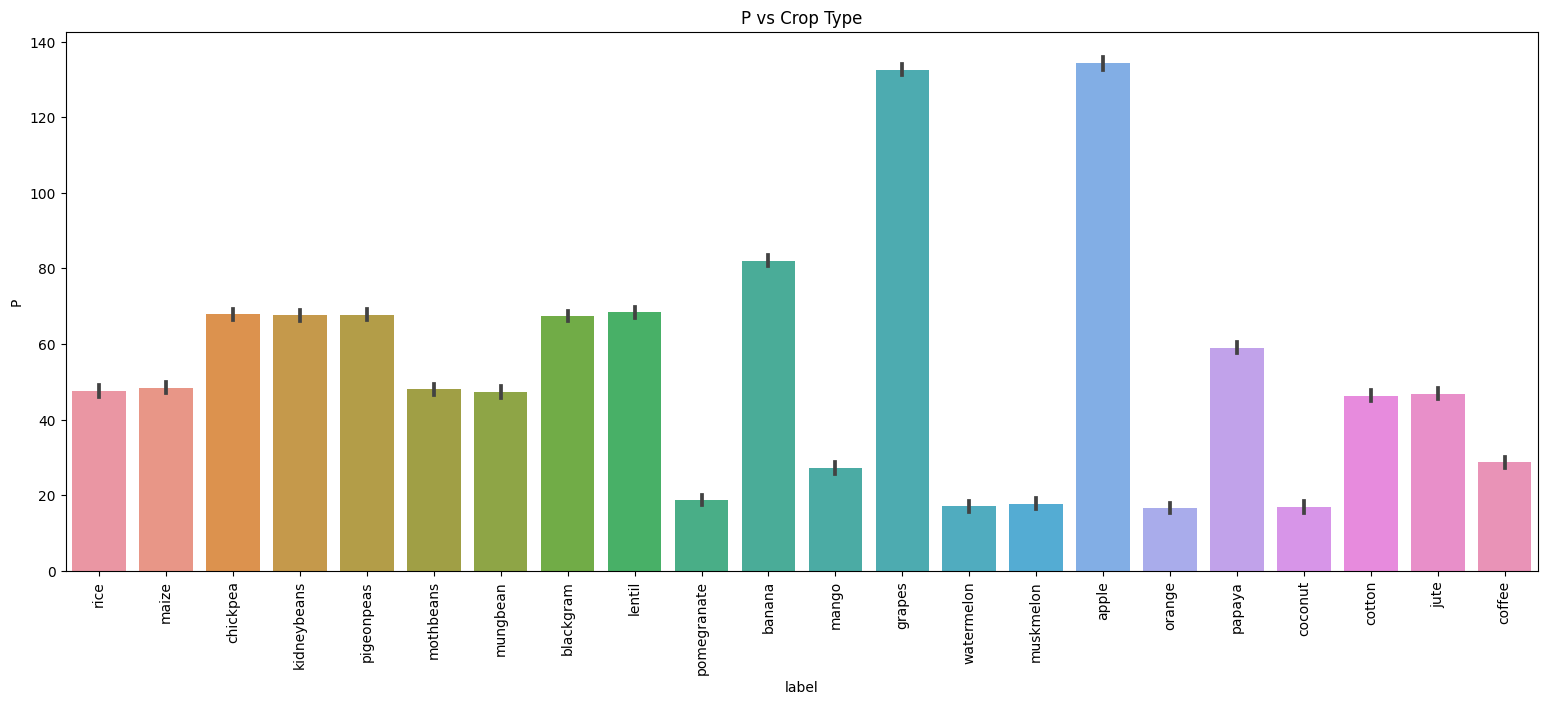

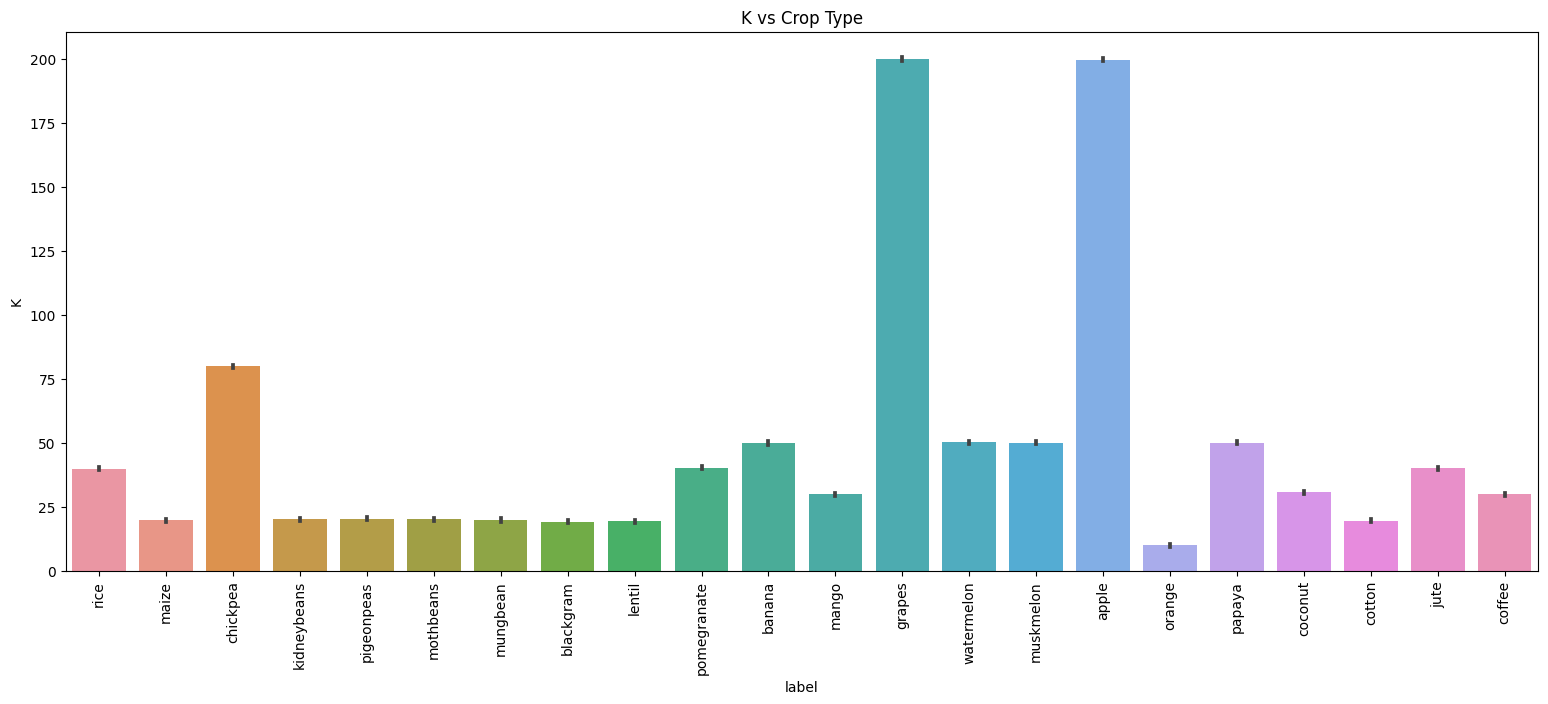

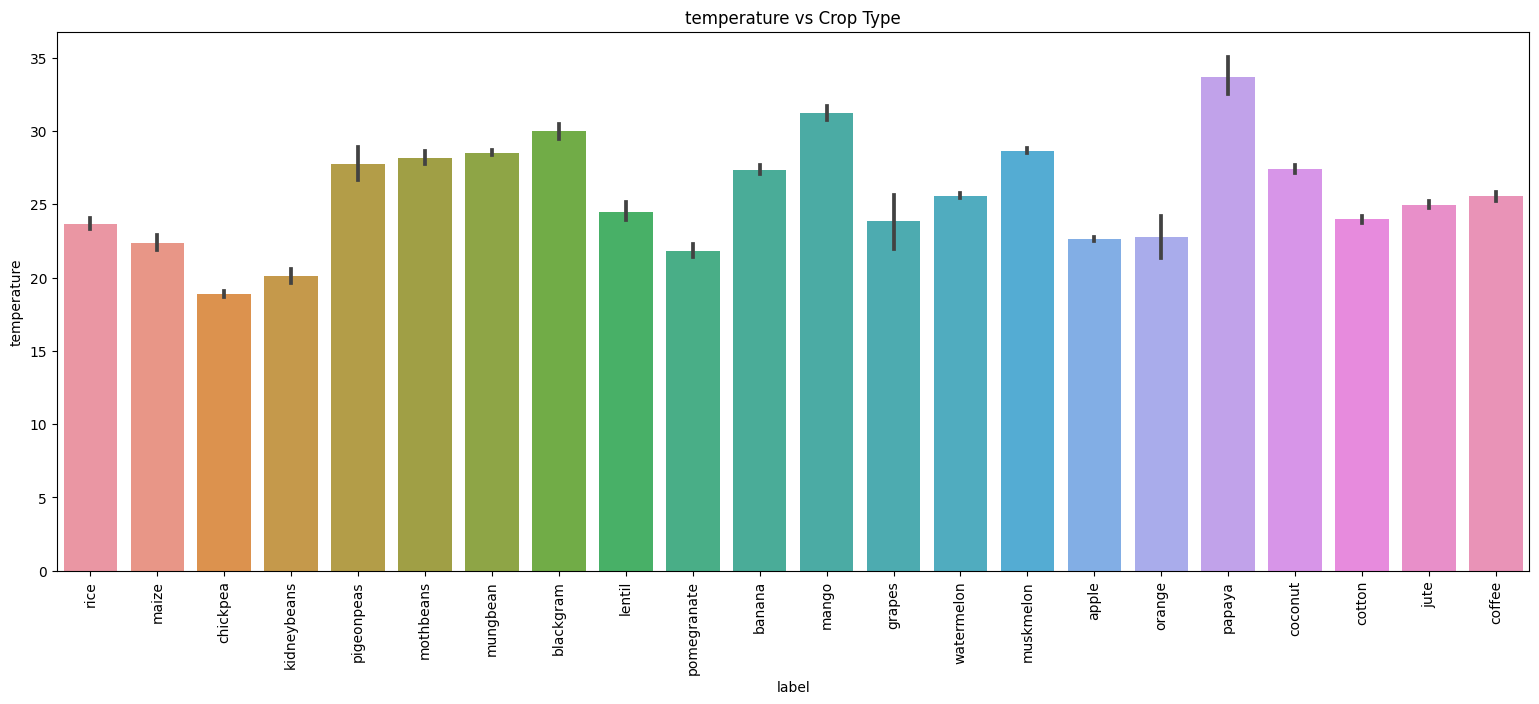

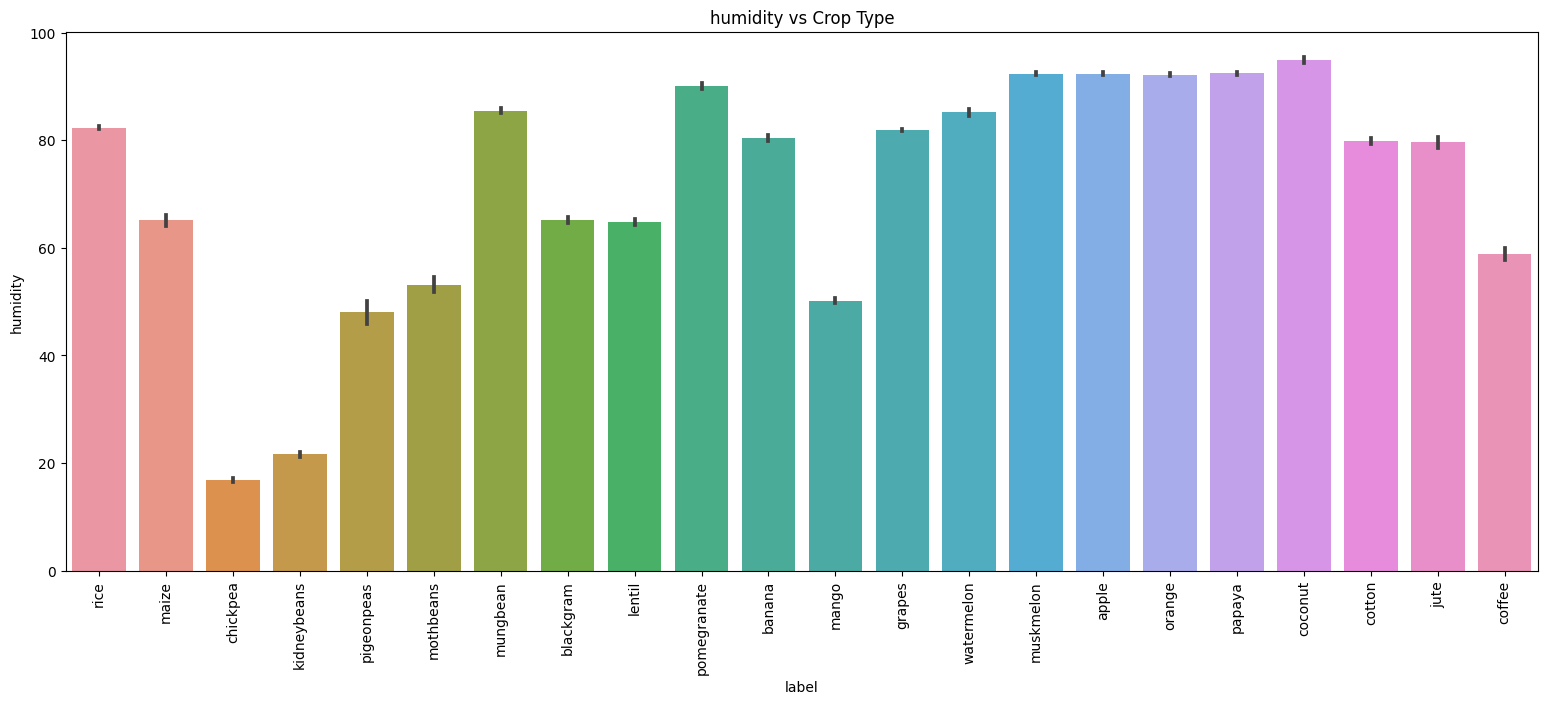

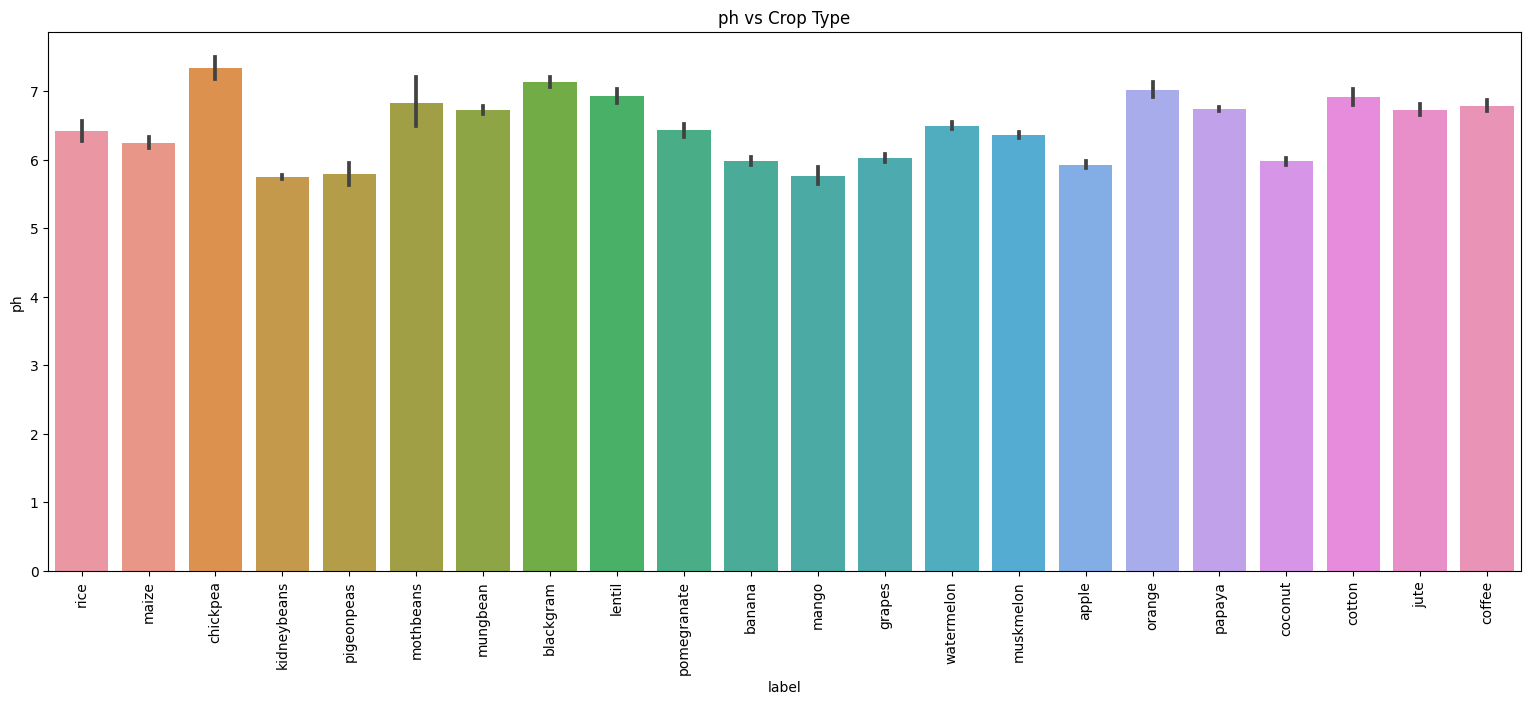

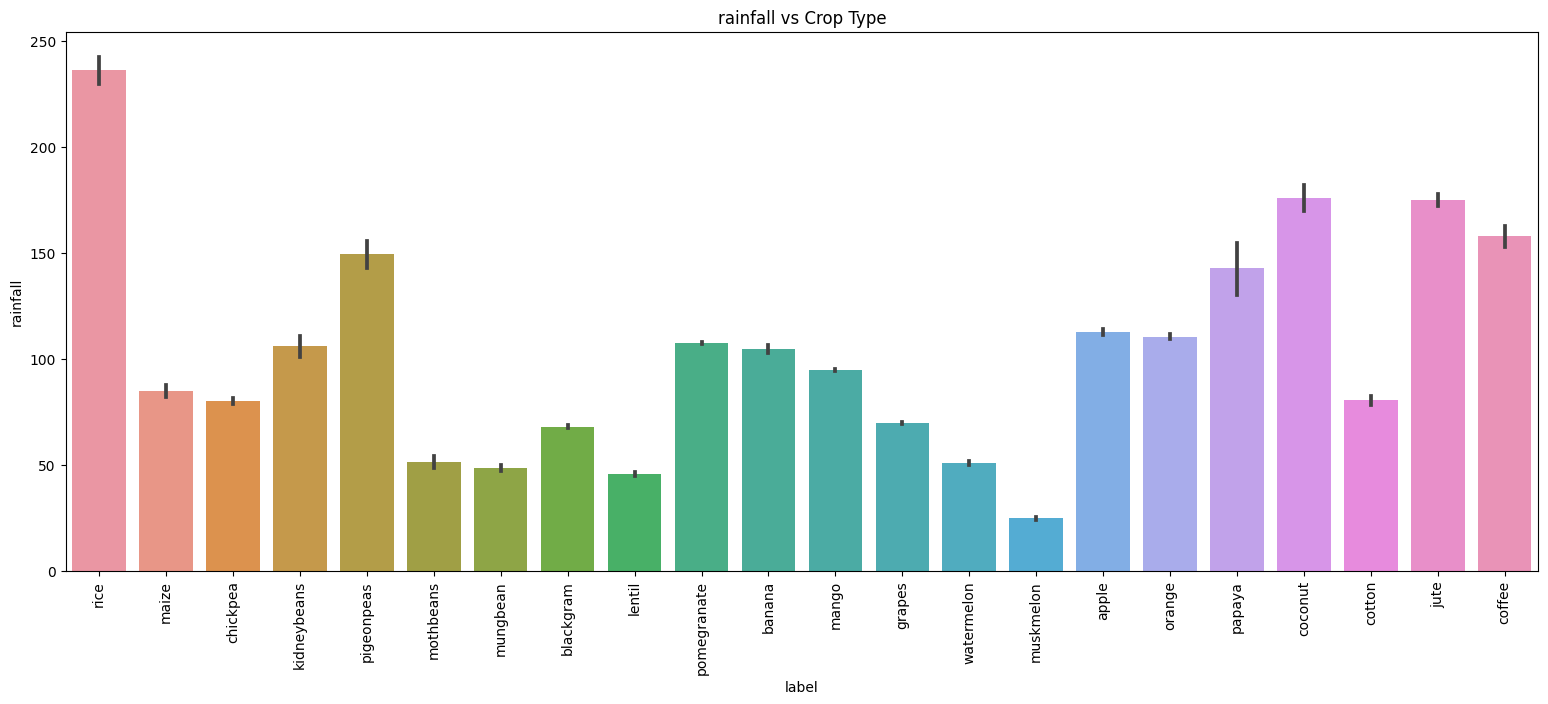

In [8]:
for column in all_columns:
    plt.figure(figsize=(19,7))
    sns.barplot(x = "label", y = column, data = data)
    plt.xticks(rotation=90)
    plt.title(f"{column} vs Crop Type")
    plt.show()

<Figure size 1900x1700 with 0 Axes>

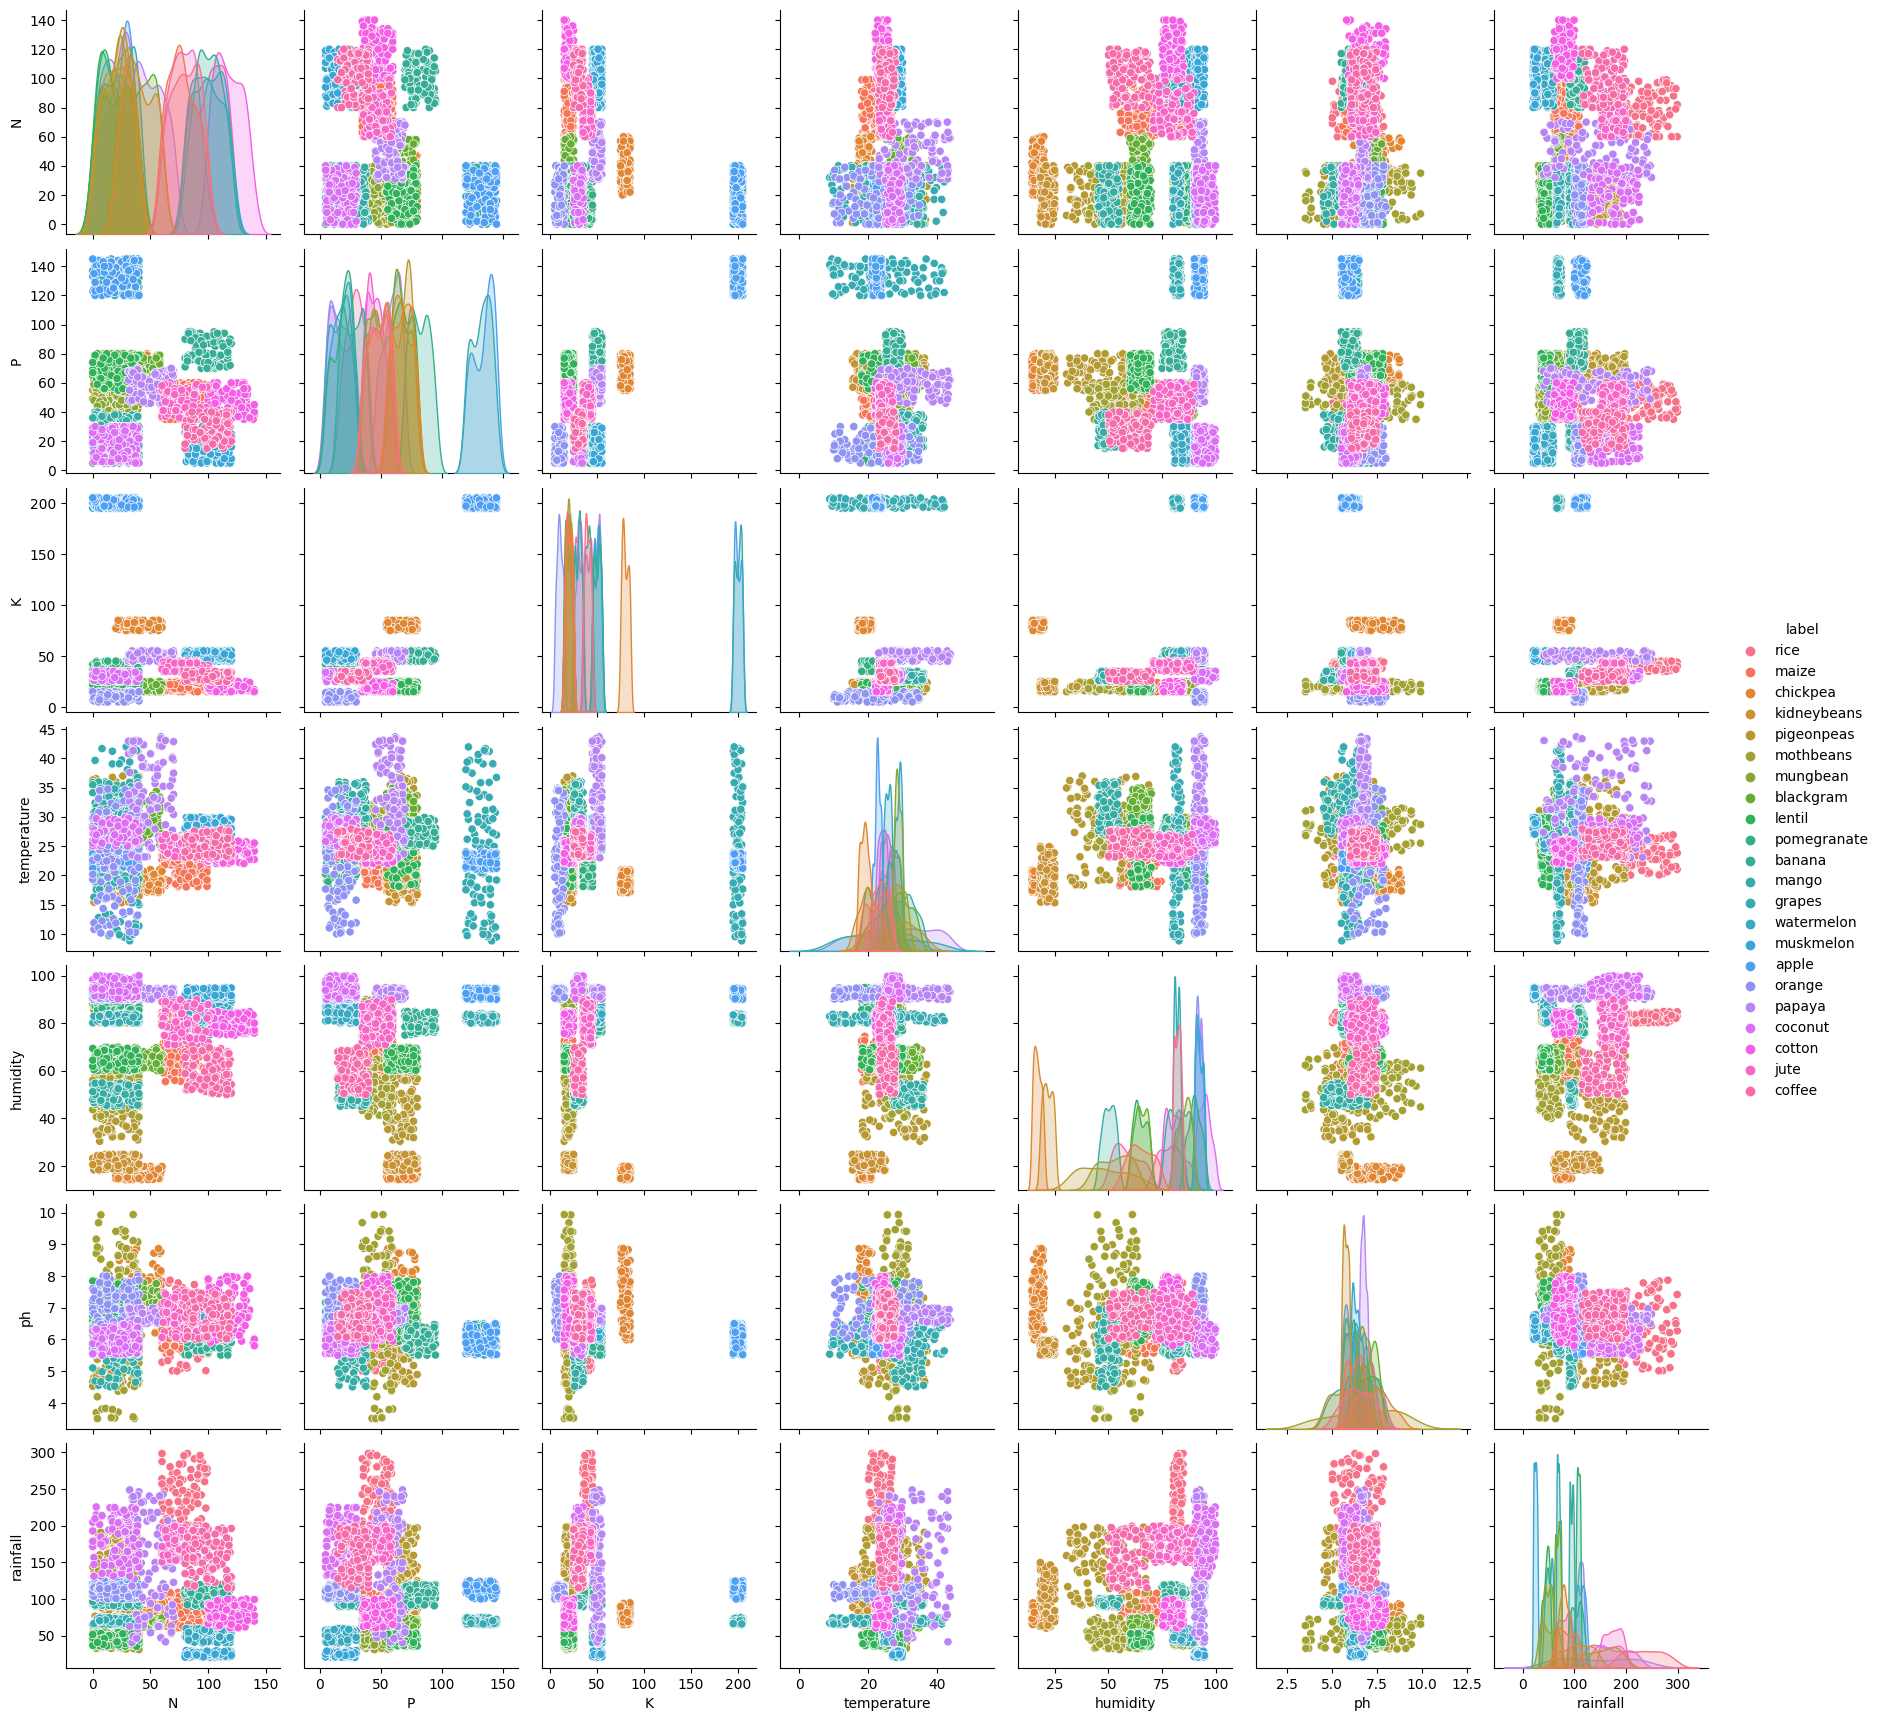

In [9]:
plt.figure(figsize=(19,17))
sns.pairplot(data, hue = "label")
plt.show()

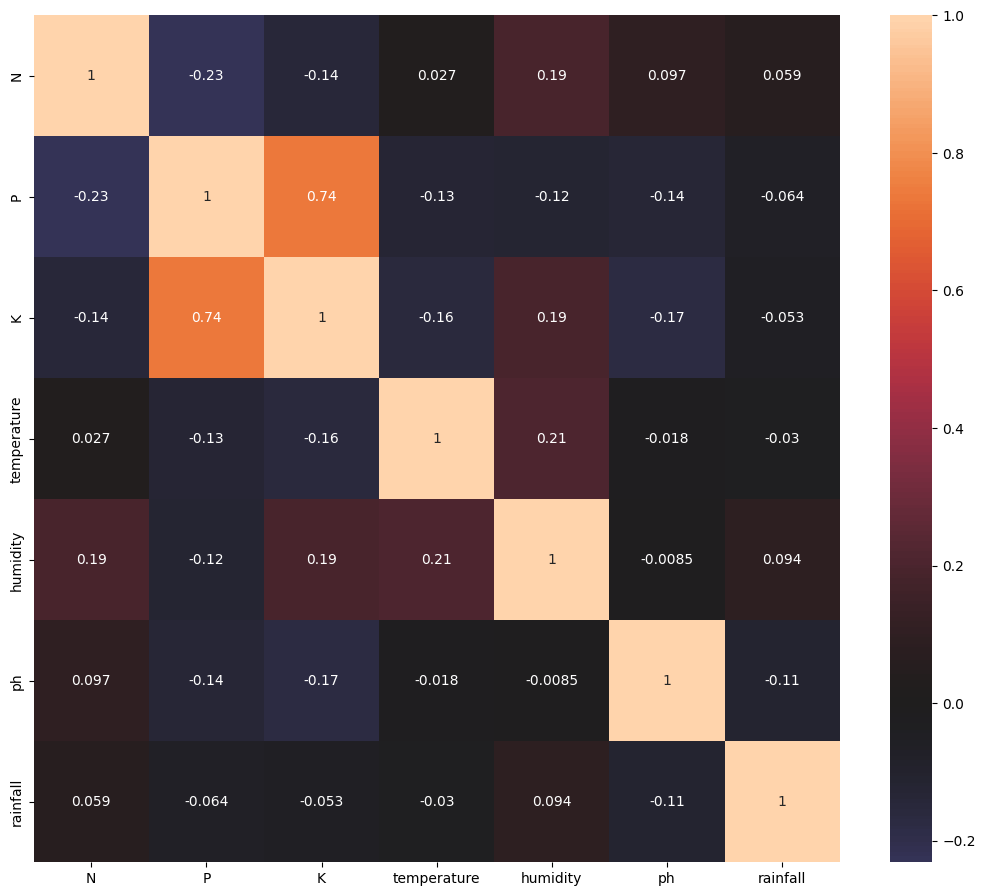

In [10]:
plt.figure(figsize = (13,11))
sns.heatmap(data.corr(), center = 0, annot = True)
plt.show()

From the paiplot we can see that different clusters are formed based on the feautures in the dataset. First let us experiment with KNearestNeighbors model.

In [11]:
label_encoder = LabelEncoder()
X = data[all_columns]
y = label_encoder.fit_transform(data["label"])
print(X.shape, y.shape)

(2200, 7) (2200,)


In [12]:
label_dict = {}
for i in range(22):
    label_dict[i] = label_encoder.inverse_transform([i])[0]
label_dict

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (1760, 7), (1760,)
Train Data: (440, 7), (440,)


# SVM Classifier

Accuracy on Test Data: 97.72727272727273%


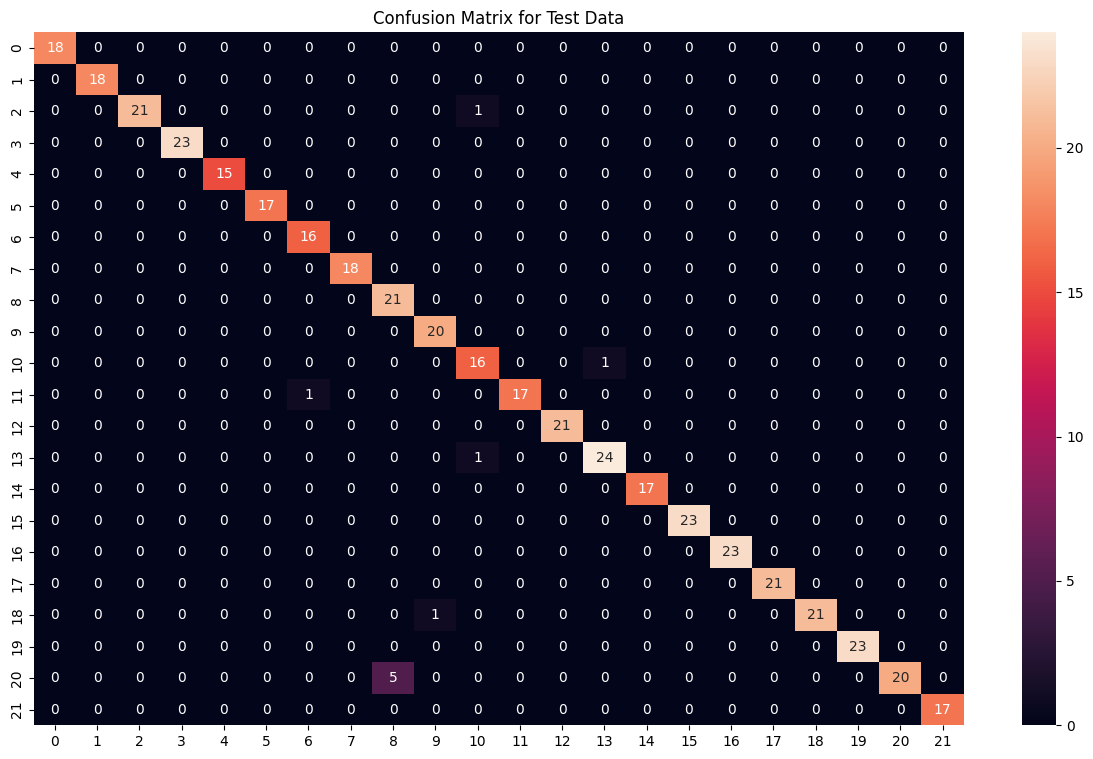


Accuracy on Whole Data: 98.54545454545455%


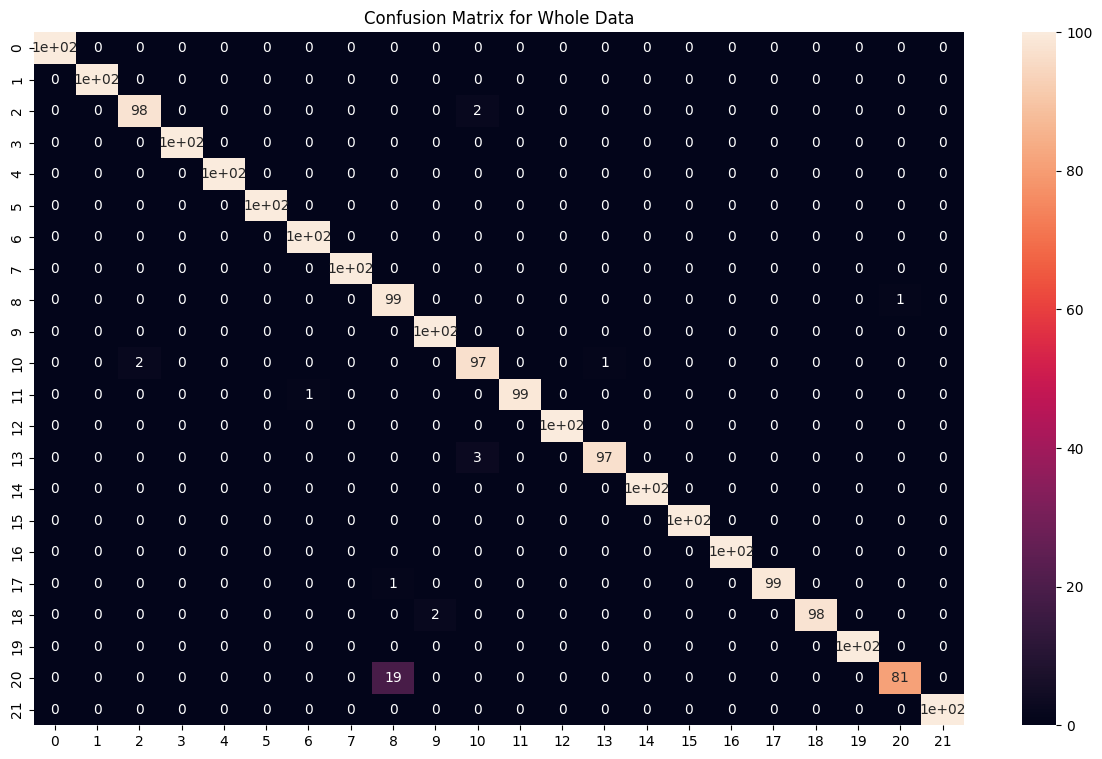

In [14]:
svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))
svm_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = svm_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

# KNN Classifier

Accuracy at k = 1 is 0.975
Accuracy at k = 2 is 0.9681818181818181
Accuracy at k = 3 is 0.975
Accuracy at k = 4 is 0.9795454545454545
Accuracy at k = 5 is 0.9772727272727273
Accuracy at k = 6 is 0.9681818181818181
Accuracy at k = 7 is 0.9704545454545455
Accuracy at k = 8 is 0.9704545454545455
Accuracy at k = 9 is 0.9659090909090909
Accuracy at k = 10 is 0.9613636363636363
Accuracy at k = 11 is 0.9590909090909091
Accuracy at k = 12 is 0.9568181818181818
Accuracy at k = 13 is 0.9590909090909091
Accuracy at k = 14 is 0.9590909090909091
Accuracy at k = 15 is 0.9568181818181818
Accuracy at k = 16 is 0.9545454545454546
Accuracy at k = 17 is 0.9545454545454546
Accuracy at k = 18 is 0.95
Accuracy at k = 19 is 0.9522727272727273
Accuracy at k = 20 is 0.9477272727272728
Accuracy at k = 21 is 0.9431818181818182
Accuracy at k = 22 is 0.9409090909090909
Accuracy at k = 23 is 0.9363636363636364
Accuracy at k = 24 is 0.9409090909090909
Accuracy at k = 25 is 0.9318181818181818
Accuracy at k = 26 is 0.

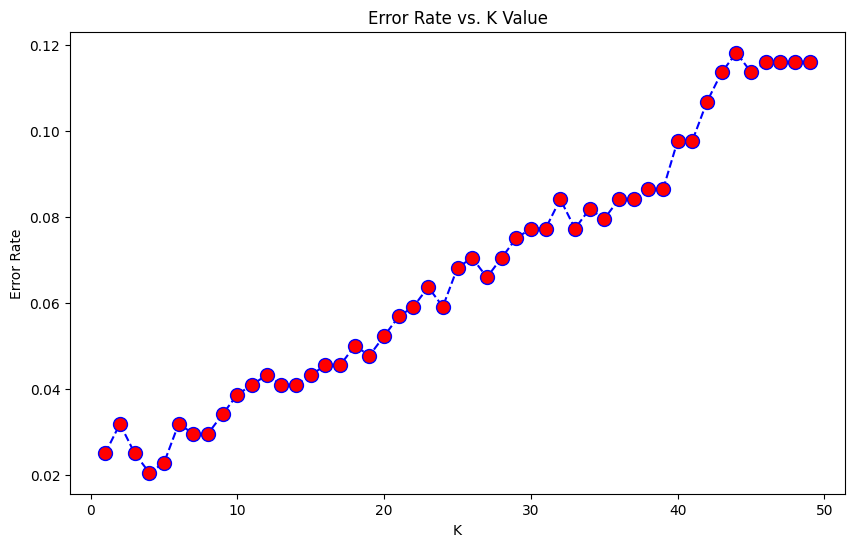

In [15]:
error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Accuracy on Test Data: 97.95454545454545%


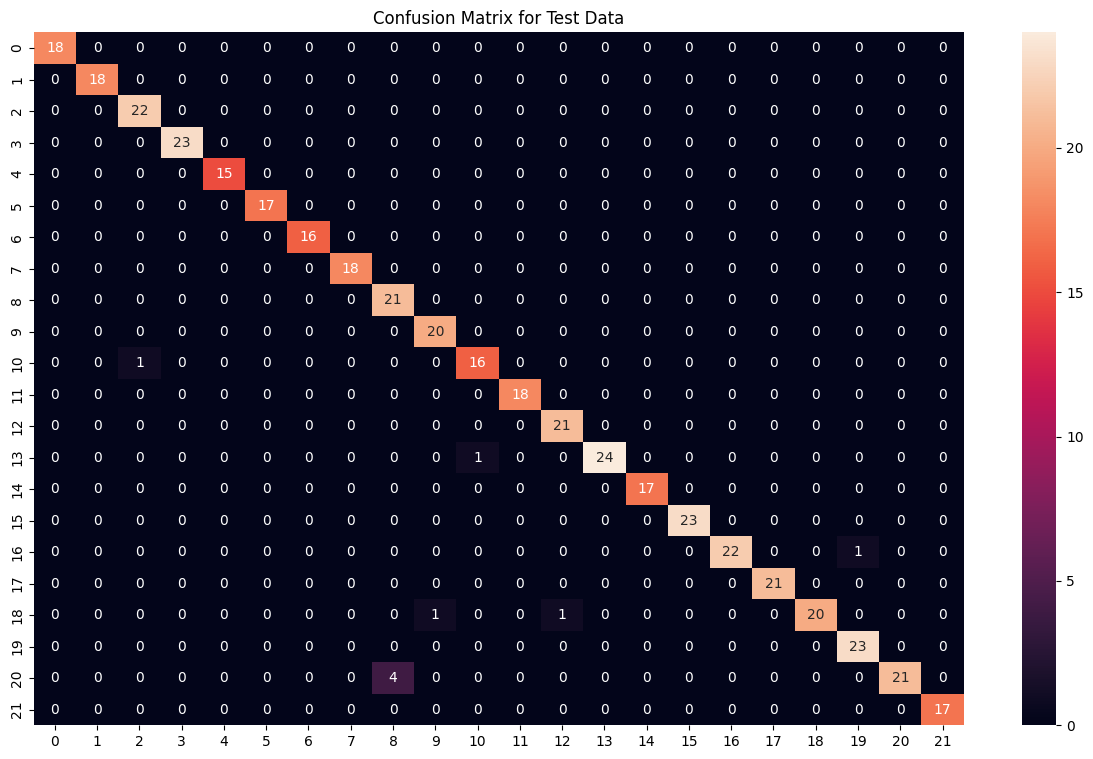


Accuracy on Whole Data: 98.04545454545455%


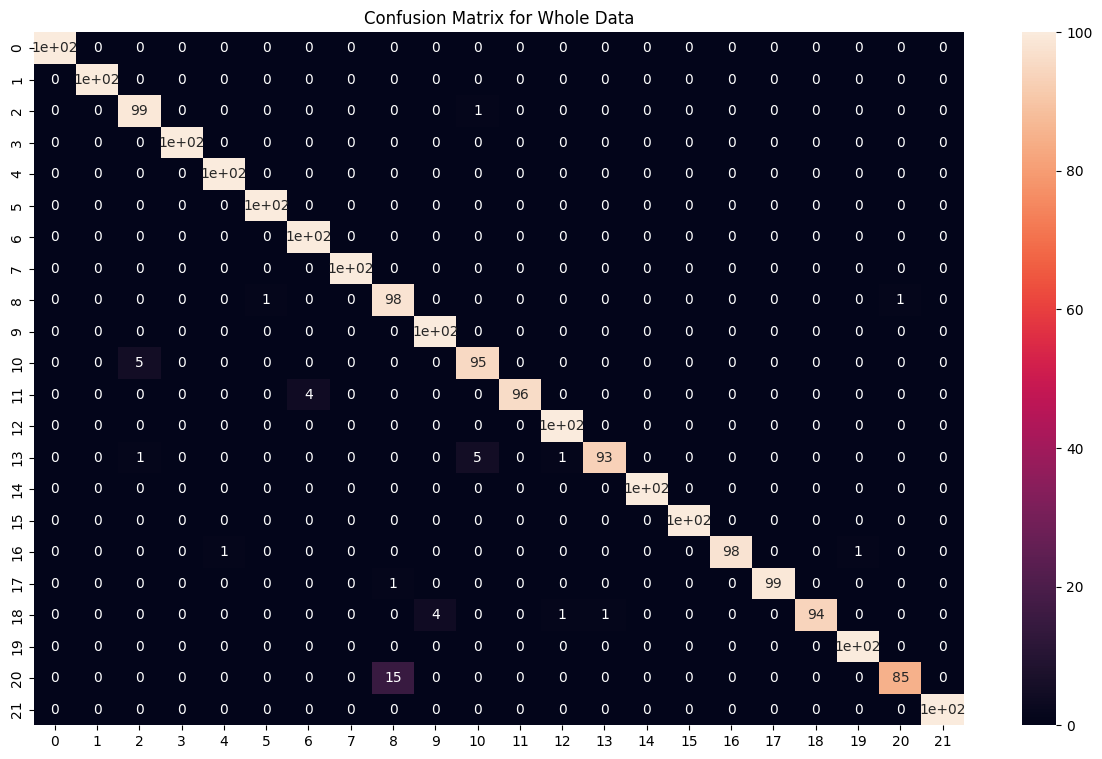

In [16]:
# Optimal K value is 4
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 4))
knn_pipeline.fit(X_train, y_train)

# Test Data Metrics
predictions = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()
plt.show()

print()

# Whole Data Metrics
predictions = knn_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

# Random Forest Classifier

Accuracy on Test Data: 99.77272727272727%


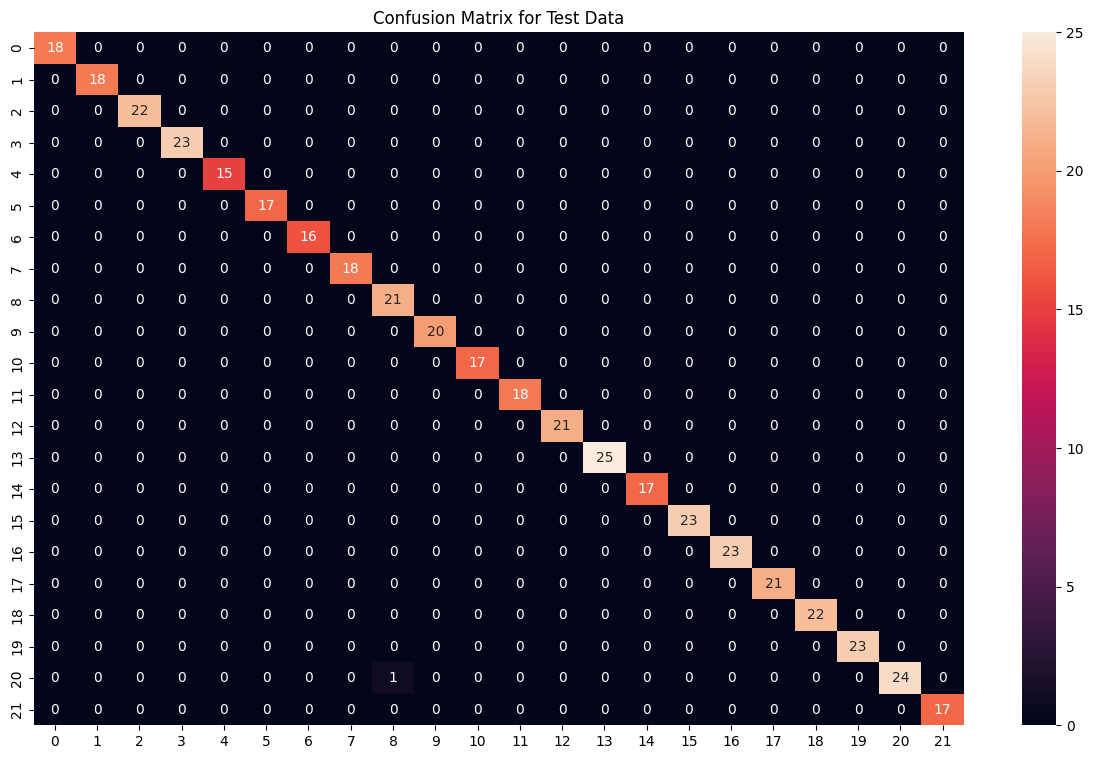


Accuracy on Whole Data: 99.95454545454545%


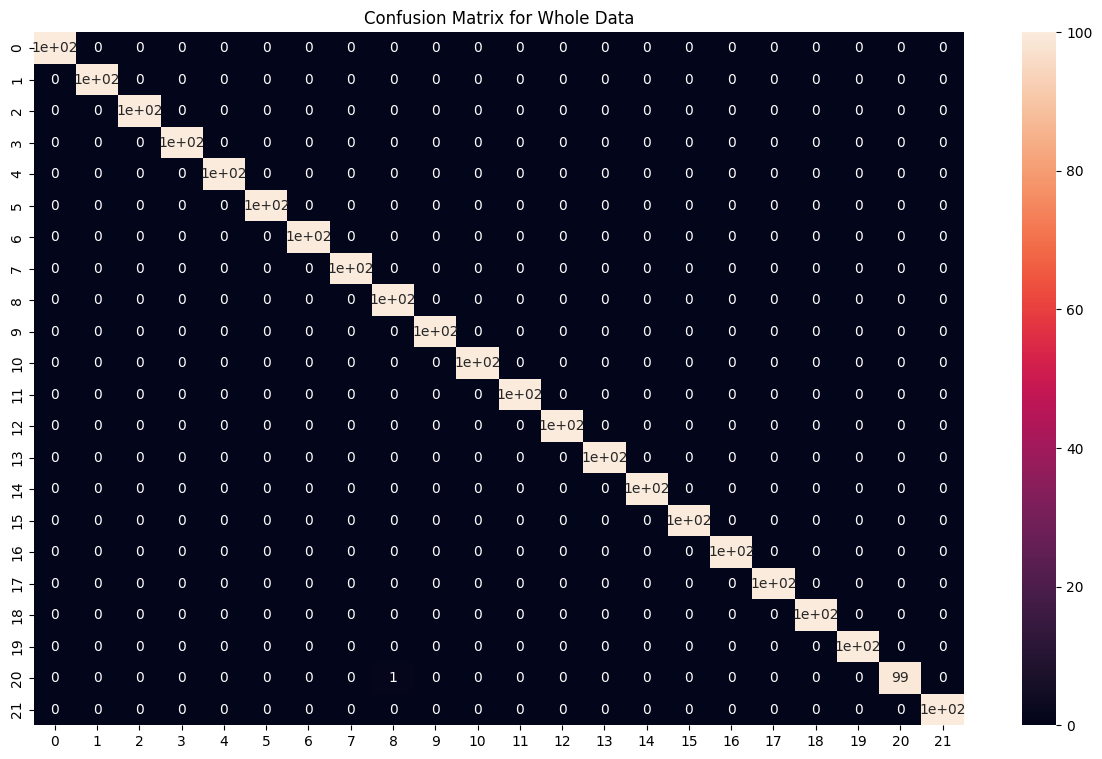

In [17]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rf_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = rf_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

# LightBGM

Accuracy on Test Data: 99.77272727272727%


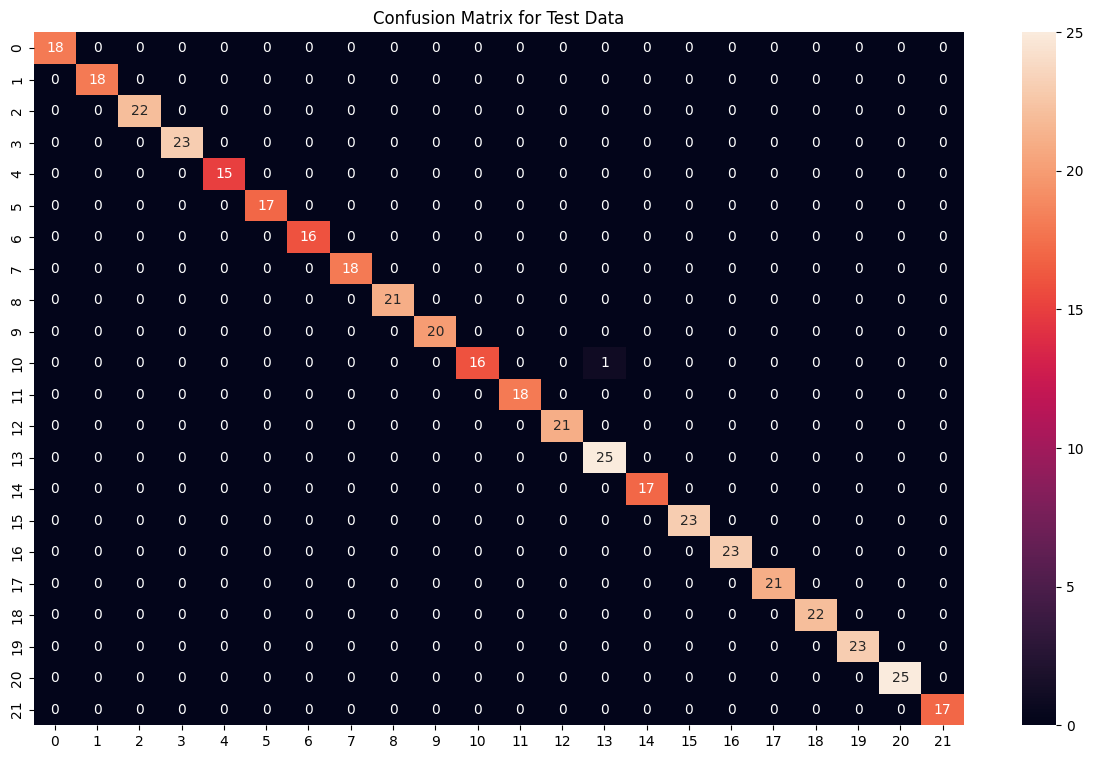


Accuracy on Whole Data: 99.95454545454545%


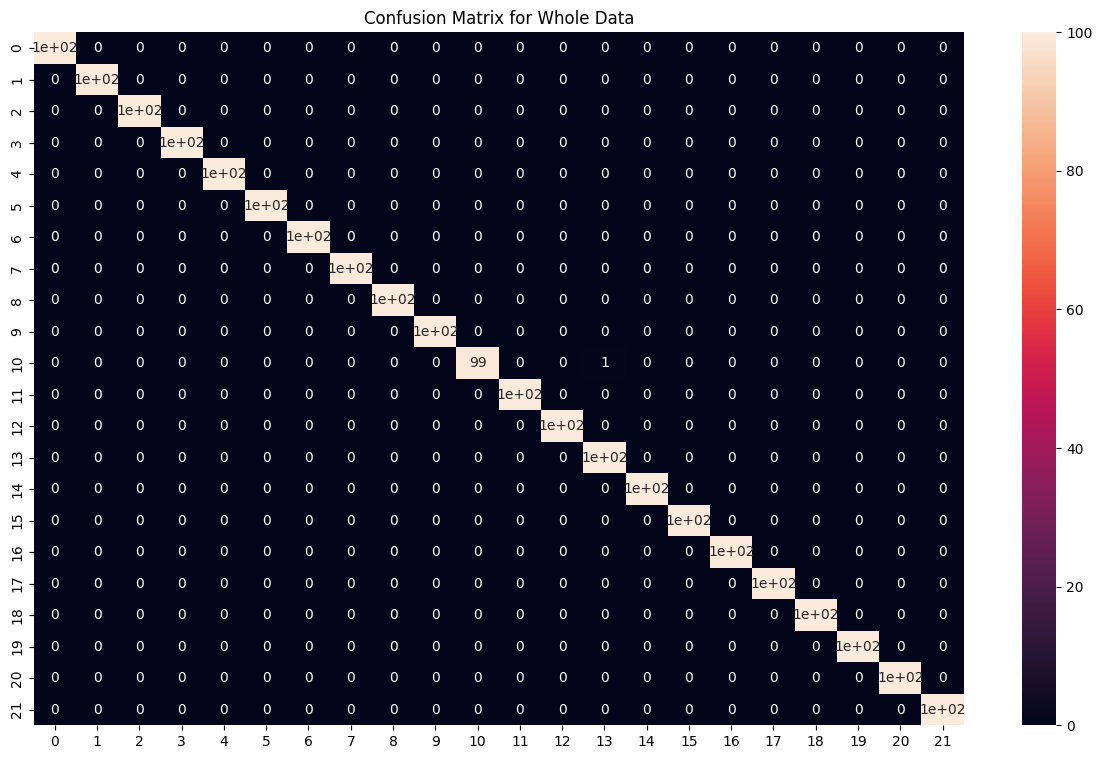

In [18]:
import lightgbm as lgb
lgbm=lgb.LGBMClassifier(max_depth=6)
lgbm.fit(X_train,y_train)

predicted_values = lgbm.predict(X_test)

accuracy = accuracy_score(y_test, predicted_values)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predicted_values), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = lgbm.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

# XGBoost Classifier

Accuracy on Test Data: 99.31818181818181%


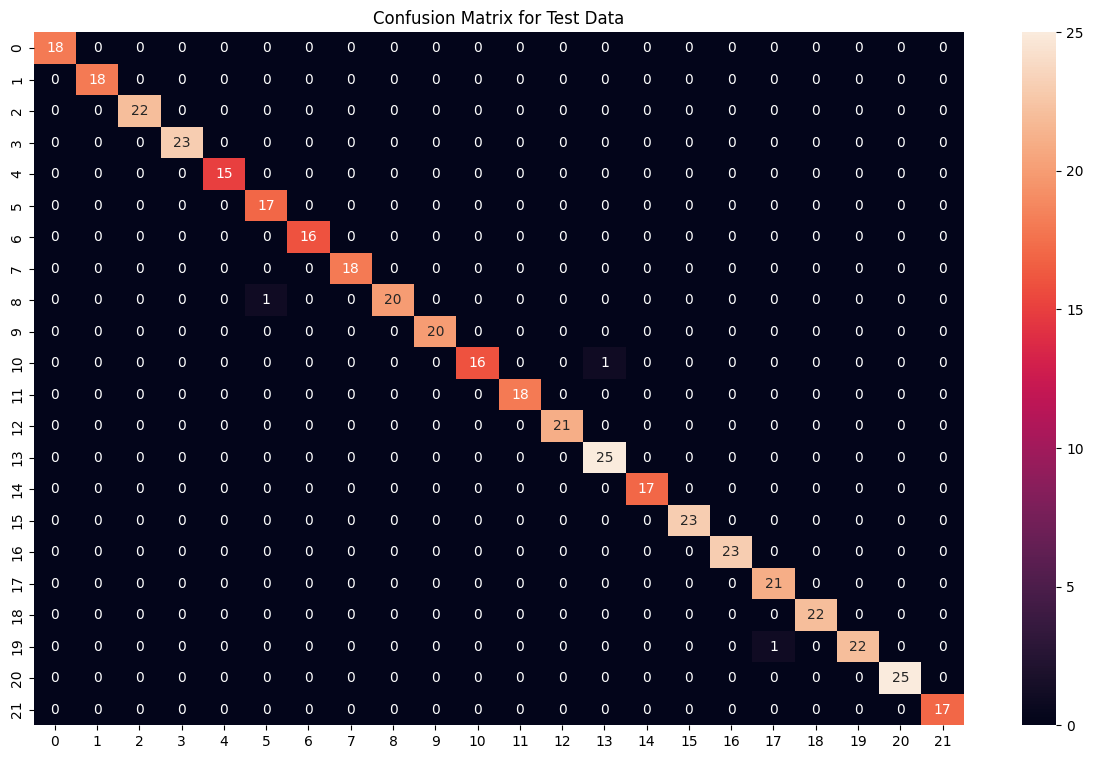


Accuracy on Whole Data: 99.86363636363636%


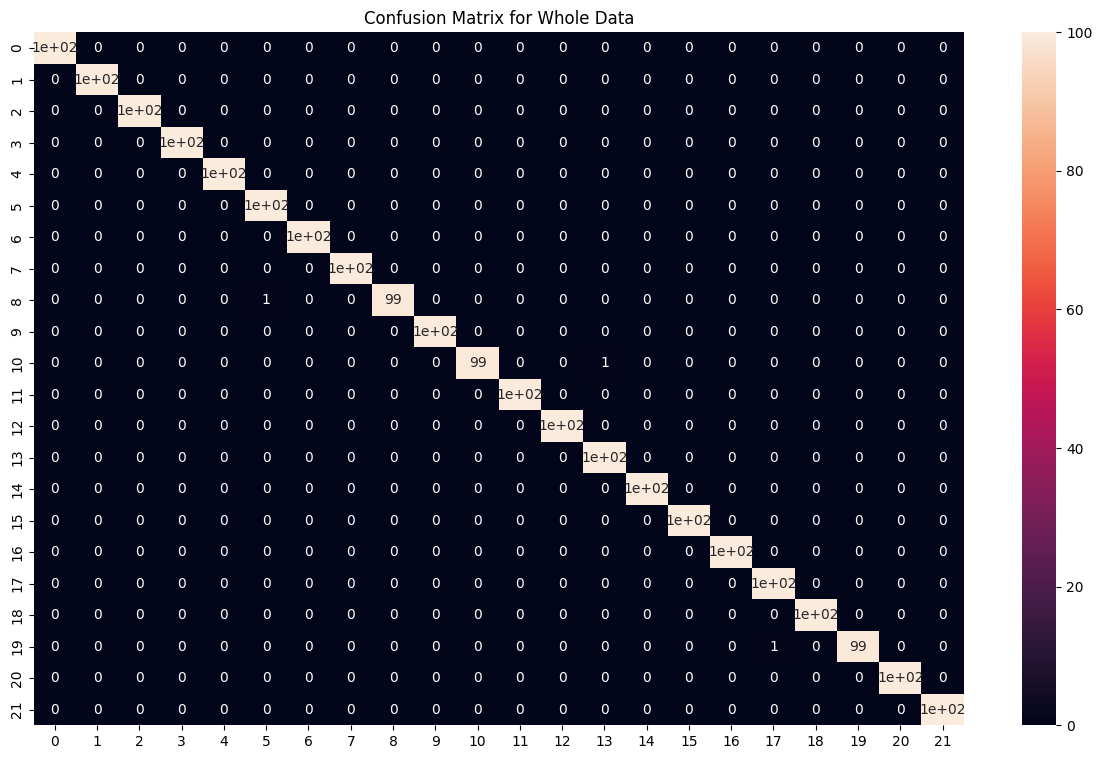

In [19]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

In [20]:
pickle.dump(knn_pipeline, open("knn_pipeline.pkl", "wb"))
pickle.dump(rf_pipeline, open("rf_pipeline.pkl", "wb"))
pickle.dump(xgb_pipeline, open("xgb_pipeline.pkl", "wb"))
pickle.dump(svm_pipeline, open("svm_pipeline.pkl", "wb"))
pickle.dump(lgbm, open("lgbm_pipeline.pkl", "wb"))
pickle.dump(label_dict, open("label_dictionary.pkl", "wb"))
print("All Models Saved")

All Models Saved


Accuracy on Whole Data: 99.0%


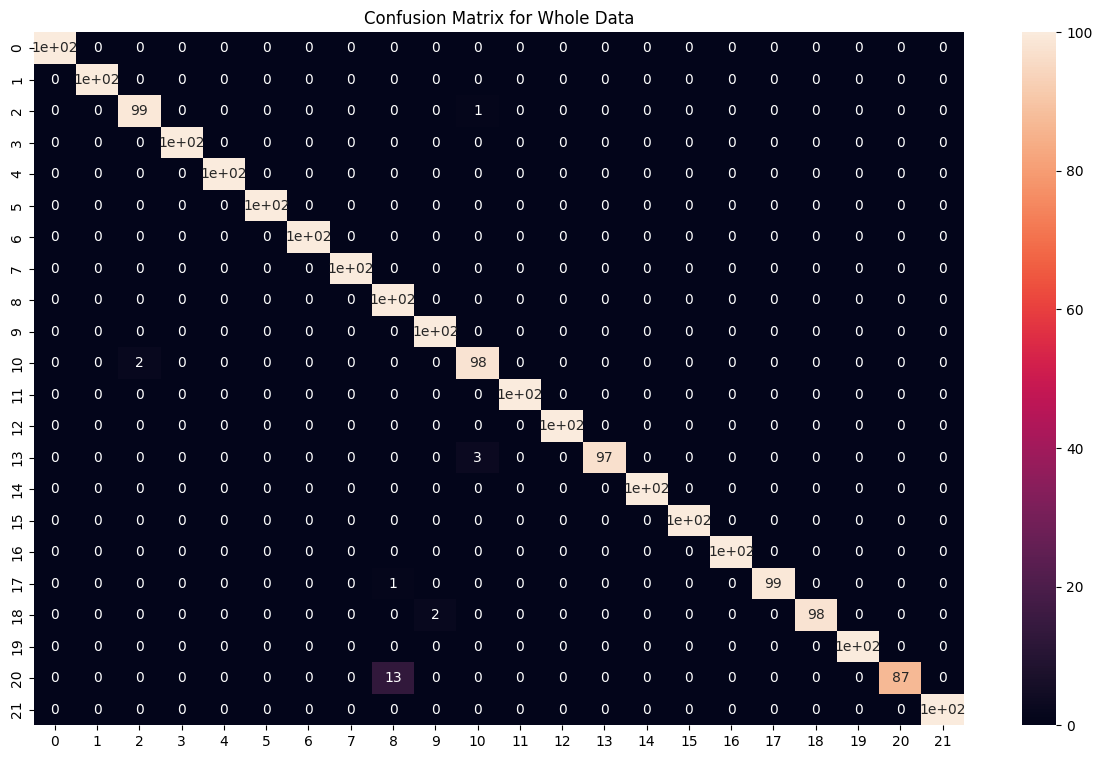

the accuracy by combining these models together is: 99.0%


In [23]:
from scipy import stats

def crop_prediction(input_data):
    prediction_data = {
        "svm_model_prediction": svm_pipeline.predict(input_data)[0],
        "svm_model_probability": max(svm_pipeline.predict_proba(input_data)[0]) * 100,
        "rf_model_prediction": rf_pipeline.predict(input_data)[0],
        "rf_model_probability": max(rf_pipeline.predict_proba(input_data)[0]) * 100,
        "knn_model_prediction": knn_pipeline.predict(input_data)[0],
        "knn_model_probability": max(knn_pipeline.predict_proba(input_data)[0]) * 100,
    }

    all_predictions = [
           # prediction_data["lgbm_model_prediction"],
            prediction_data["svm_model_prediction"],
           # prediction_data["xgb_model_prediction"],
            prediction_data["rf_model_prediction"],
            prediction_data["knn_model_prediction"],
        ]

    all_probs = [
           # prediction_data["lgbm_model_probability"],
            prediction_data["svm_model_probability"],
           # prediction_data["xgb_model_probability"],
            prediction_data["rf_model_probability"],
            prediction_data["knn_model_probability"],
        ]

    if len(set(all_predictions)) == len(all_predictions):
        prediction_data["final_prediction"] = all_predictions[all_probs.index(max(all_probs))]
    else:
        prediction_data["final_prediction"] = stats.mode(all_predictions)[0][0]

    return prediction_data["final_prediction"]

predictions_final= []
for input in X.itertuples():
  input_data = np.asarray(input[1:]).reshape(1,-1)
  predictions_final.append(crop_prediction(input_data))
predict = np.array(predictions_final)
#print(predict)
acc = accuracy_score(y, predict)
print(f"Accuracy on Whole Data: {acc*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predict), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(f"the accuracy by combining these models together is: {acc*100}%")

In [ ]:
pip show sklearn